<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [2]:
#connect to google drive
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/LablFiles/Stat_NLP_Internal_Lab/')

Let us check for the version of installed tensorflow.

In [4]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [18]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [39]:
productds = pd.read_csv('product_data.csv')

In [40]:
productds.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
165,B01K5RGPIS,Samsung,Samsung Galaxy S6 G920A 64GB Unlocked GSM 4G L...,https://www.amazon.com/Samsung-Unlocked-Octa-C...,https://m.media-amazon.com/images/I/61Nb5eGCbv...,2.9000000,https://www.amazon.com/product-reviews/B01K5RGPIS,61,0.0000000,0.0000000
632,B07T6JXP9J,Motorola,Moto Z3 Play - Unlocked - 32 GB - Deep Indigo ...,https://www.amazon.com/Moto-Z3-Play-Unlocked-W...,https://m.media-amazon.com/images/I/71rybVDKCZ...,4.5000000,https://www.amazon.com/product-reviews/B07T6JXP9J,2,189.9500000,0.0000000
132,B01D0JV7AO,Samsung,Samsung Galaxy S6 SM-G920V 32GB Sapphire Black...,https://www.amazon.com/Samsung-SM-G920V-Sapphi...,https://m.media-amazon.com/images/I/81cvwVzNoi...,3.5000000,https://www.amazon.com/product-reviews/B01D0JV7AO,1,119.9500000,0.0000000
180,B01MY2FEAS,Samsung,Samsung Galaxy Note 5 N920T 32GB - White (T-Mo...,https://www.amazon.com/Samsung-Galaxy-Note-N92...,https://m.media-amazon.com/images/I/61MAsozHca...,3.7000000,https://www.amazon.com/product-reviews/B01MY2FEAS,14,366.7300000,0.0000000
401,B07DCB61LG,OnePlus,OnePlus 6 A6000 64GB/6GB Mirror Black - Dual B...,https://www.amazon.com/OnePlus-A6000-64GB-Mirr...,https://m.media-amazon.com/images/I/61x5tBufni...,4.4000000,https://www.amazon.com/product-reviews/B07DCB61LG,59,479.0000000,0.0000000


In [41]:
productds.shape

(720, 10)

In [42]:
len(pd.unique(productds['asin']))

720

Inferences
1) There are unique 720 mobile products

In [43]:
reviewsds = pd.read_csv('reviews.csv')

In [44]:
reviewsds.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
63259,B07RT1X4FJ,Nathan Gonzalez,5,"September 13, 2019",True,WAY CHEAPER THAN BUYING NEW,Phone arrived in great condition with 97% batt...,3.0000000
37873,B0731HBTZ7,Georges M,5,"July 8, 2019",True,Great phone.,"Works great, no complains",nan
5142,B00CEKXJ3Y,Luis E. Varela,4,"August 25, 2014",True,Not the greatest thing yet,"Awesome features, nice device and all.. but wh...",1.0000000
65965,B07WHKYDV3,Oso,5,"October 8, 2019",True,Good purchase,"Device is performing as expected and more, may...",4.0000000
15217,B00V7FY44A,DC_Amazonian,5,"October 14, 2015",True,It's not the Galaxy S5-- in all of the right w...,"As an owner of a Galaxy S5, I was very disappo...",8.0000000


In [37]:
reviewsds.shape

(67986, 8)

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [45]:
productds.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [46]:
productds.drop(['url','image','reviewUrl'],axis=1,inplace=True)

In [47]:
productds.columns

Index(['asin', 'brand', 'title', 'rating', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [48]:
productds.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,720,720,B00E6FGSHY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,716,10,Samsung,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,720,718,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,720.0000000,NaN,NaN,NaN,3.7137500,0.7160138,1.0000000,3.3000000,3.8000000,4.1000000,5.0000000
totalReviews,720.0000000,NaN,NaN,NaN,105.6791667,167.6011014,1.0000000,7.0000000,32.0000000,122.2500000,983.0000000
price,720.0000000,NaN,NaN,NaN,234.9489306,200.0084407,0.0000000,97.5125000,188.9750000,336.7250000,999.9900000
originalPrice,720.0000000,NaN,NaN,NaN,63.6907778,172.4053696,0.0000000,0.0000000,0.0000000,0.0000000,999.9900000


In [50]:
reviewsds.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,67986,720,B00F2SKPIM,981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,67984,47323,Amazon Customer,6507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,67986.0000000,NaN,NaN,NaN,3.8079163,1.5829058,1.0000000,3.0000000,5.0000000,5.0000000,5.0000000
date,67986,2983,"December 11, 2019",234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verified,67986,2,True,61225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,67972,41489,Five Stars,6043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,67965,59811,Good,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpfulVotes,27215.0000000,NaN,NaN,NaN,8.2296895,31.9548772,1.0000000,1.0000000,2.0000000,5.0000000,990.0000000


In [51]:
productds['brand'].value_counts()

Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Name: brand, dtype: int64

In [53]:
reviewsds['rating'].value_counts()

5    37752
1    12743
4     8824
3     4752
2     3915
Name: rating, dtype: int64

### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

Inferences...
1) There are 720 unique mobile products
2) Samsung has 346 products which is 48%...so samsung has wide variety of mobile products and is top brand
3) Price Range and related aspects:
   a) 50% of the products have price less than 199 
   b) 75% of the products have price less than 336
  The mean value of price is 235 and max is 999 
  Thus the price distribution exhibits positive skewness

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

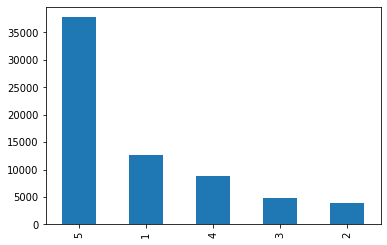

In [55]:
reviewsds['rating'].value_counts().plot(kind='bar')

In [ ]:
productds['brand'].value_counts().plot(kind='bar')

Inferences...
1) Almost 48% of the products are Samsung
2) more than 50% of the reviews are for Samsung products

### 4.5 Display average rating per brand

In [56]:
productds.groupby('brand').mean()['rating']

brand
ASUS       3.8600000
Apple      3.7825397
Google     3.7710526
HUAWEI     4.0218750
Motorola   3.6438095
Nokia      3.3863636
OnePlus    3.5800000
Samsung    3.6326590
Sony       3.7888889
Xiaomi     4.4152174
Name: rating, dtype: float64

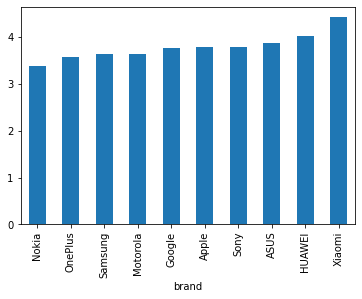

In [57]:
productds.groupby('brand').mean()['rating'].sort_values().plot(kind='bar')

Inferences...
1) 'Xiaomi' brand has highest average rating.
2) 'Nokia' brand has lowest average rating.

### 4.6 Display average price per brand

In [58]:
productds.groupby('brand').mean()['price']

brand
ASUS       309.6860000
Apple      303.5811111
Google     241.8676316
HUAWEI     218.8290625
Motorola   139.1210476
Nokia      111.4438636
OnePlus    426.1960000
Samsung    256.5272543
Sony       332.7248148
Xiaomi     214.9676087
Name: price, dtype: float64

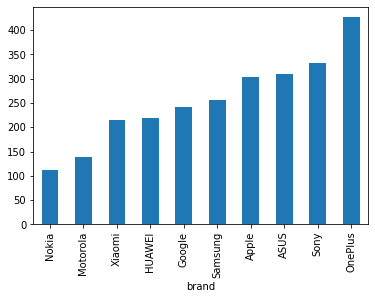

In [59]:
productds.groupby('brand').mean()['price'].sort_values().plot(kind='bar')

In [60]:
productds['price'].describe()

count   720.0000000
mean    234.9489306
std     200.0084407
min       0.0000000
25%      97.5125000
50%     188.9750000
75%     336.7250000
max     999.9900000
Name: price, dtype: float64

### 4.7 Display average 'totalReviews' per brand

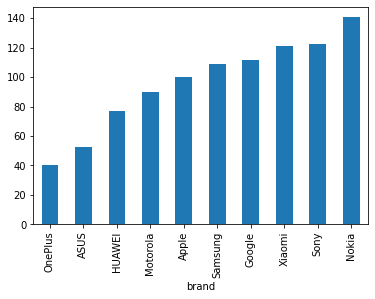

In [61]:
productds.groupby('brand').mean()['totalReviews'].sort_values().plot(kind='bar')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [63]:
dfprodreview= pd.merge(reviewsds,productds,on='asin',how='inner')

In [64]:
dfprodreview.shape

(67986, 14)

In [65]:
dfprodreview.sample(2)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
37788,B0731HBTZ7,Syaira Thomas,1,"September 14, 2019",True,Scams,Reported the phone stolen,nan,Apple,"Apple iPhone 7 32GB, Rose Gold (Renewed)",3.8000000,452,199.9500000,210.0000000
17628,B013XAPUW6,sarah smith,2,"November 24, 2018",True,buy new,Phone turned off 4 months after purchase never...,nan,Samsung,"Samsung Galaxy Note 5, Black 64GB (Verizon Wi...",3.6000000,799,399.9900000,0.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [66]:
dfprodreview.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},inplace=True)

In [67]:
dfprodreview.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [68]:
dfprodreview['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [69]:
dfprodreview[dfprodreview['verified']==True].shape

(61225, 14)

In [70]:
df_varified = dfprodreview[dfprodreview['verified']==True]

In [71]:
df_varified.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [72]:
df_varified['brand'].value_counts()

Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: brand, dtype: int64

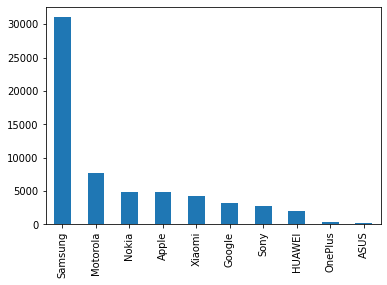

In [73]:
df_varified['brand'].value_counts().plot(kind='bar')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [74]:
dfprodreview.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [75]:
finaldf = dfprodreview[['brand','body','price','user_rating','review_title']]

In [76]:
finaldf.sample(5)

,brand,body,price,user_rating,review_title
3312,Samsung,It was not listed as a prepaid phone. Couldn't...,0.0000000,2,Didn't do the job
26100,Google,I bought this when it was priced at $250 dolla...,185.0000000,5,Best value for your money.
66018,Motorola,After having this phone for a couple of weeks ...,119.9900000,5,Great Productivity Phone
37463,Motorola,great product,244.4500000,5,great prtoduct
63051,Apple,Very good product. Screen protector need to be...,651.5800000,5,Good choice


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

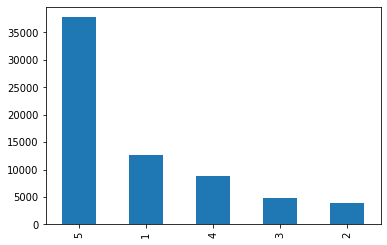

In [77]:
finaldf['user_rating'].value_counts().plot(kind='bar')

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [78]:
def sentiment(rating) :
  if rating == 1 or rating ==2 :  #Lets consider these values as negative sentiment
    return -1
  if rating == 4 or rating ==5 :  #Lets consider these values as positive sentiment
    return 1
  if rating == 3 :                #Lets consider this as neutral sentiment
    return 0
  

In [80]:
finaldf['Sentiment'] = finaldf['user_rating'].apply(lambda x : sentiment(x))

### 4.15 Check frequency distribution of the 'sentiment'

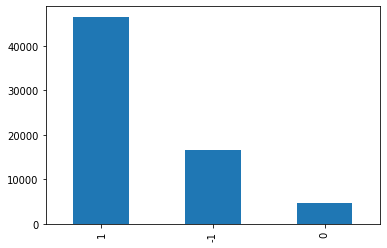

In [81]:
finaldf['Sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [82]:
pd.crosstab(finaldf['Sentiment'], finaldf['brand']).T

Sentiment,-1,0,1
brand,,,
ASUS,64,25,162
Apple,1434,322,3389
Google,1169,267,2351
HUAWEI,309,124,1792
Motorola,2104,653,6123
Nokia,1710,540,3665
OnePlus,52,13,282
Samsung,8537,2292,22800
Sony,770,280,2146


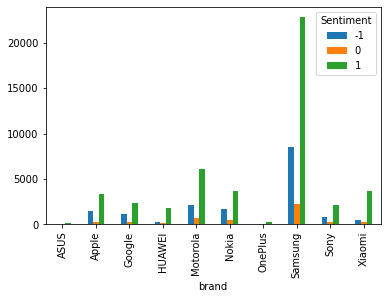

In [83]:
pd.crosstab(finaldf['Sentiment'], finaldf['brand']).T.plot(kind='bar')

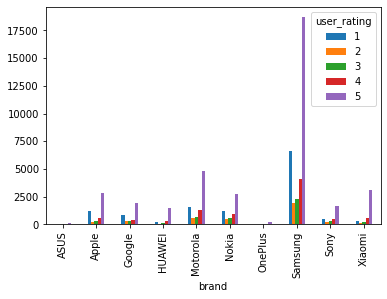

In [84]:
pd.crosstab(finaldf['user_rating'], finaldf['brand']).T.plot(kind='bar')

Based on above charts it seems that people aggresively rate their most postive or mmost negative experiance.
The users have given rating in case of user rating 5 or 1 for all brands 

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [85]:
finaldf.dtypes

brand            object
body             object
price           float64
user_rating       int64
review_title     object
Sentiment         int64
dtype: object

In [86]:
finaldf['body'] = finaldf['body'].astype('str')

In [87]:
finaldf['body'] = finaldf['body'].str.lower()

In [88]:
finaldf.sample(2)

,brand,body,price,user_rating,review_title,Sentiment
22235,Samsung,best phone ever i loved...........,399.0000000,5,beautiful phone ..,1
23156,Samsung,you just get what you pay for.,104.9000000,2,Two Stars,-1


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [89]:
finaldf['body'] = finaldf['body'].str.replace('[^\w\s]',' ')  #Lets replace all except words and space characters

In [90]:
finaldf.sample(2)

,brand,body,price,user_rating,review_title,Sentiment
61895,Samsung,i have metro pcs and i was very interested in ...,398.0000000,5,Best Purchase Dollar for Dollar,1
65890,Motorola,i love it,129.0000000,5,Five Stars,1


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [91]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [92]:
finaldf['body'] = finaldf['body'].apply(lambda x : ' '.join(word for word in x.split() if word not in (stop_words)))

In [93]:
finaldf.sample(2)

,brand,body,price,user_rating,review_title,Sentiment
34845,Samsung,great item,449.9900000,5,Amazing gift,1
2320,Samsung,replacement type phone needed calls occasional...,97.6900000,4,handles the basics,1


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [94]:
import nltk 
nltk.download('wordnet') 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() 
lemmatizer = nltk.stem.WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [95]:
def lemmatize_text_nltk(text) : 
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)] 

In [96]:
finaldf['body_1']  = finaldf['body'].apply(lambda x : lemmatize_text_nltk(x))

In [97]:
finaldf.sample(10)

,brand,body,price,user_rating,review_title,Sentiment,body_1
4969,Samsung,phone great everything need user friendly woul...,0.0000000,5,Awesome Phone,1,"[phone, great, everything, need, user, friendl..."
43481,Samsung,product looks words good first sight helpful i...,199.0000000,5,good product,1,"[product, look, word, good, first, sight, help..."
24081,Sony,good phone live 16 gb battery make day know so...,119.9900000,4,"Excellent Phone for the Price, your getting wh...",1,"[good, phone, live, 16, gb, battery, make, day..."
53738,Sony,neat phone,370.7400000,5,Five Stars,1,"[neat, phone]"
43861,Sony,iphone 6 user went great slow 2017 replaced ba...,249.9900000,5,Nice big phone,1,"[iphone, 6, user, went, great, slow, 2017, rep..."
33929,Samsung,phone network locked supposed use said unlocked,399.9800000,1,Very disappointed,-1,"[phone, network, locked, supposed, use, said, ..."
23680,Samsung,received galaxy phone described excellent cond...,0.0000000,5,Great phone from exvellent seller,1,"[received, galaxy, phone, described, excellent..."
11553,Nokia,first time purchasing unlocked phone amazon wo...,103.9800000,5,Well I bought 3 of these phones and they all c...,1,"[first, time, purchasing, unlocked, phone, ama..."
35824,Samsung,fine 3 phone working country,139.9900000,5,All was fine: 3 the phone working here in my c...,1,"[fine, 3, phone, working, country]"
40710,Samsung,nice phone excellent camera battery also nice ...,269.9900000,4,Great product,1,"[nice, phone, excellent, camera, battery, also..."


Seems that nltk library is unable to apply lemmatisation correctly for all reviews as I can still see workds with 'ing' 'ed'
Lets try another library

In [98]:
import spacy
nlp = spacy.load('en')

In [99]:
def lemmatize_text_spacy(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [100]:
finaldf['body_2']  = finaldf['body'].apply(lambda x : lemmatize_text_spacy(x))

In [101]:
finaldf.sample(10)

,brand,body,price,user_rating,review_title,Sentiment,body_1,body_2
25603,Motorola,battery life worse part unacceptable phone pri...,0.0000000,1,Do not buy. The battery does not hold up on this.,-1,"[battery, life, worse, part, unacceptable, pho...",battery life bad part unacceptable phone price...
28927,Samsung,great phone drop height 2ft onto wood floor re...,0.0000000,5,nice piece of tech,1,"[great, phone, drop, height, 2ft, onto, wood, ...",great phone drop height 2 ft onto wood floor r...
24226,Sony,even use phone drains battery get charger 7am ...,169.0000000,1,"Nice phone, horrible battery life.",-1,"[even, use, phone, drain, battery, get, charge...",even use phone drain battery get charger 7 a.m...
61937,Xiaomi,really great phone cheap fingerprint scanner s...,176.9400000,5,Amazing for cost,1,"[really, great, phone, cheap, fingerprint, sca...",really great phone cheap fingerprint scanner s...
25089,Apple,touch screen work,198.9000000,1,..,-1,"[touch, screen, work]",touch screen work
54279,NaN,really wish could expand memory,549.0000000,5,Gamers must get it,1,"[really, wish, could, expand, memory]",really wish could expand memory
14987,Samsung,everything works perfection,169.9300000,5,Five Stars,1,"[everything, work, perfection]",everything work perfection
48610,Apple,practically brand new far condition thing batt...,476.0000000,5,Brand new phone,1,"[practically, brand, new, far, condition, thin...",practically brand new far condition thing batt...
1211,Samsung,phone fast works smooth give screen completely...,0.0000000,2,"SMOOTH,YES..RES/SCREEN QUALITY..NOOOOO GOOD!!",-1,"[phone, fast, work, smooth, give, screen, comp...",phone fast work smooth give screen completely ...
43487,Samsung,phone described looked brand new far issues sa...,199.0000000,5,I am very satisfied.,1,"[phone, described, looked, brand, new, far, is...",phone describe look brand new far issue satisfy


Based on random manual observation of result of lemmatisation in 'body_1' (using nltk library) and 'body_2' (using space library).
Space library seems to be giving better results. Lets use 'body_2' column for feature building

### 5.5 Write a function to check word frequency of the text

In [102]:
def workFrequency(text) :
  lst = text.split()
  return len(lst)

In [103]:
finaldf['WordFrequency'] = finaldf['body'].apply(lambda x : workFrequency(x))

In [104]:
finaldf.sample(10)

,brand,body,price,user_rating,review_title,Sentiment,body_1,body_2,WordFrequency
58711,Samsung,renewed unlocked usa modelsamsung galaxy s10 a...,429.9900000,5,"Renewed S10, Good value, missing some features...",1,"[renewed, unlocked, usa, modelsamsung, galaxy,...",renew unlocked usa modelsamsung galaxy s10 app...,122
12841,Motorola,manufacturer stopped supporting getting softwa...,0.0000000,1,No more software updates for this dead end dev...,-1,"[manufacturer, stopped, supporting, getting, s...",manufacturer stop support get software update ...,31
522,Motorola,great,139.9900000,5,Five Stars,1,[great],great,1
51042,Xiaomi,months using phone lcd began fail terrible fee...,268.9900000,1,Cheated!,-1,"[month, using, phone, lcd, began, fail, terrib...",month use phone lcd begin fail terrible feel r...,12
60987,Samsung,bought phone suppose unlocked find place unloc...,0.0000000,1,UPSET,-1,"[bought, phone, suppose, unlocked, find, place...",buy phone suppose unlocked find place unlock c...,23
39291,Nokia,advertised working tmobile network half true c...,54.9900000,2,I love the phone,-1,"[advertised, working, tmobile, network, half, ...",advertise work tmobile network half true conne...,27
35962,Apple,far good looks new works fine,151.9900000,5,So far so good. It looks new and it works fine,1,"[far, good, look, new, work, fine]",far good look new work fine,6
35231,Samsung,spec wise nice phone got one bogo mobile sure ...,450.1100000,2,BEWARE OF FRAGILE SCREEN,-1,"[spec, wise, nice, phone, got, one, bogo, mobi...",spec wise nice phone get one bogo mobile sure ...,42
43760,Sony,playing phone couple days extremely pleased co...,399.9900000,4,... for a couple of days now and I'm extremely...,1,"[playing, phone, couple, day, extremely, pleas...",play phone couple day extremely pleased come 5...,167
53154,Xiaomi,fantástico envío rápido,179.5000000,5,"Fantástico, envío rápido",1,"[fantástico, envío, rápido]",fantástico envío rápido,3


### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [115]:
#Lets first filter and create dataset with reviews having only top rating i.e. user_rating =5 and user ratings =4
topratingds = finaldf[(finaldf['user_rating']==5) | (finaldf['user_rating']==4)]

In [116]:
topratingds.sample(10)

,brand,body,price,user_rating,review_title,Sentiment,body_1,body_2,WordFrequency
33664,Samsung,family friends phone work straight talk,439.9800000,5,Some answers,1,"[family, friend, phone, work, straight, talk]",family friend phone work straight talk,6
8904,Samsung,fantastic phone fast beautiful screen fun use ...,0.0000000,5,I love it but.... **EDITED**,1,"[fantastic, phone, fast, beautiful, screen, fu...",fantastic phone fast beautiful screen fun use ...,251
25317,Samsung,arrived quickly easy set verizon contract serv...,73.5000000,5,Great Phone,1,"[arrived, quickly, easy, set, verizon, contrac...",arrive quickly easy set verizon contract servi...,34
66219,Motorola,excellent product good relationship quality vs...,119.9900000,5,Recommended 100%,1,"[excellent, product, good, relationship, quali...",excellent product good relationship quality vs...,9
8333,Samsung,got today love,0.0000000,5,Love it!!!!,1,"[got, today, love]",get today love,3
14776,Motorola,good product,149.9900000,5,Good Value,1,"[good, product]",good product,2
10555,Samsung,buying verizon service currently best windows ...,0.0000000,4,it's currently the best windows phone on the m...,1,"[buying, verizon, service, currently, best, wi...",buy verizon service currently good window phon...,516
44844,Google,going break phone review seller review seller ...,219.9900000,5,So happy!,1,"[going, break, phone, review, seller, review, ...",go break phone review seller review seller pho...,231
41817,Apple,impecable superando expectativas,479.0000000,5,Excelente,1,"[impecable, superando, expectativas]",impecable superando expectativas,3
7522,Samsung,bought die hard flip phone brother really enjo...,0.0000000,5,Brother Loves It!,1,"[bought, die, hard, flip, phone, brother, real...",buy die hard flip phone brother really enjoy h...,25


### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [117]:
from sklearn.feature_extraction.text  import TfidfVectorizer

In [118]:
tfidfvector = TfidfVectorizer()

In [119]:
X = tfidfvector.fit_transform(finaldf['body_2'])

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [120]:
y = finaldf['Sentiment']

### 5.9 Split the data into Train & Test Sets

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
model = RandomForestClassifier(n_estimators=150)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
model.score(x_train,y_train)

0.9942424879176297

In [126]:
model.score(x_test,y_test)

0.8479603843890959

In [129]:
X.shape

(67986, 30593)

In [128]:
x_train.shape

(47590, 30593)

In [130]:
y_test.shape

(20396,)

## 7. Write your conclusion

In [ ]:
1) The training accuracy is quite high...almost reaching 100 %. However test accuracy is 84 %
2) There could be multiple reasons for this difference in training and test accuracy as below
  a) The number of features are quite huge i.e. 30593
  b) The lemmatisation is not as efficient as we expect. We tried nltk and spacy libraries. Though space is more effiecnt 
     than nltk, it is still unanle to lemmatise many words. Due to this number of features could not be reduced
3) On one side we should see how to can reduce number of features and other side should try models on other techniques like dense layer, CNN etc.